<a href="https://colab.research.google.com/github/SoniaPMi/Master-IA/blob/main/Hunger_games_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

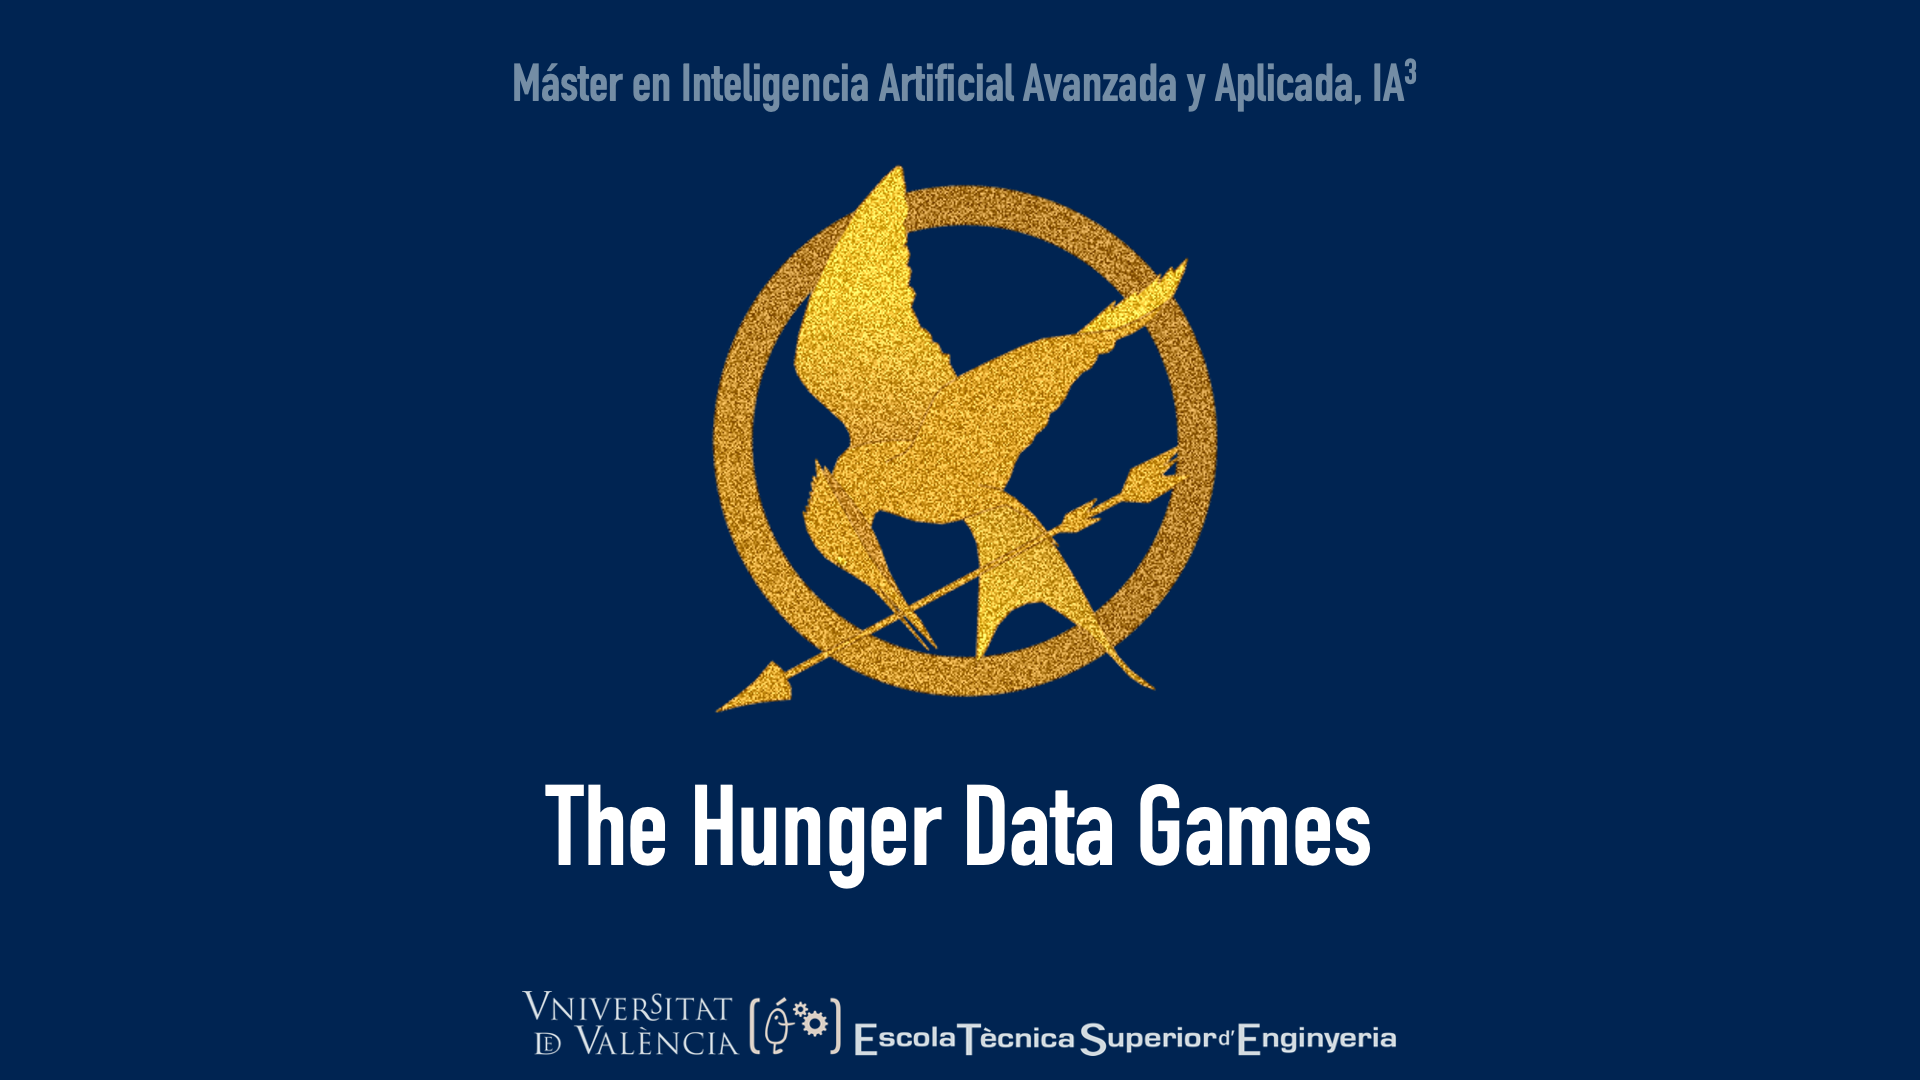

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:



In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)


from sklearn.model_selection import train_test_split


url = "https://raw.githubusercontent.com/CuadraAlconero/IDAL_IA3_CuadraAlconero/main/glass.csv"
dataframe = pd.read_csv(url, header=0)
dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

The target variable is type_of_glass

In [ ]:
dataframe.head(10)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [ ]:
dataframe.isna().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [ ]:
dataframe.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f778e2e1d90>,
      dtype=object)

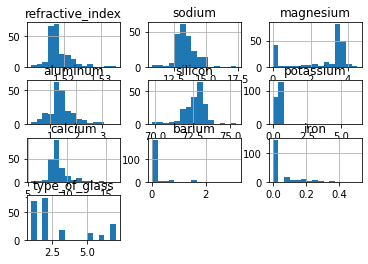

In [ ]:
import matplotlib.pyplot as plt
s = dataframe['refractive_index']
dataframe.hist(density=0, histtype='stepfilled', bins=15)

> Dado que no todas las características parecen llevar una distribución normal, aplicaremos estandarización.

In [30]:
dataframe['type_of_glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: type_of_glass, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


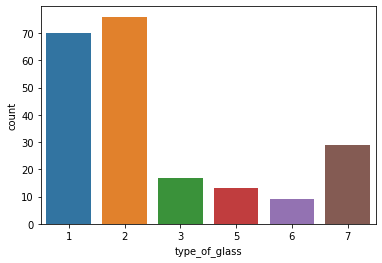

In [34]:
import seaborn as sns
sns.countplot(dataframe['type_of_glass'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


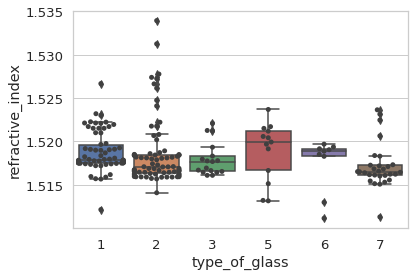

In [38]:
sns.set(style="whitegrid", font_scale=1.2)
ax = sns.boxplot(x="type_of_glass", y="refractive_index", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="refractive_index", data=dataframe, color=".25")

In [49]:
feature_names = dataframe.columns[:-1]
feature_names

Index(['refractive_index', 'sodium', 'magnesium', 'aluminum', 'silicon',
       'potassium', 'calcium', 'barium', 'iron'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.1% of the points cannot be placed; y

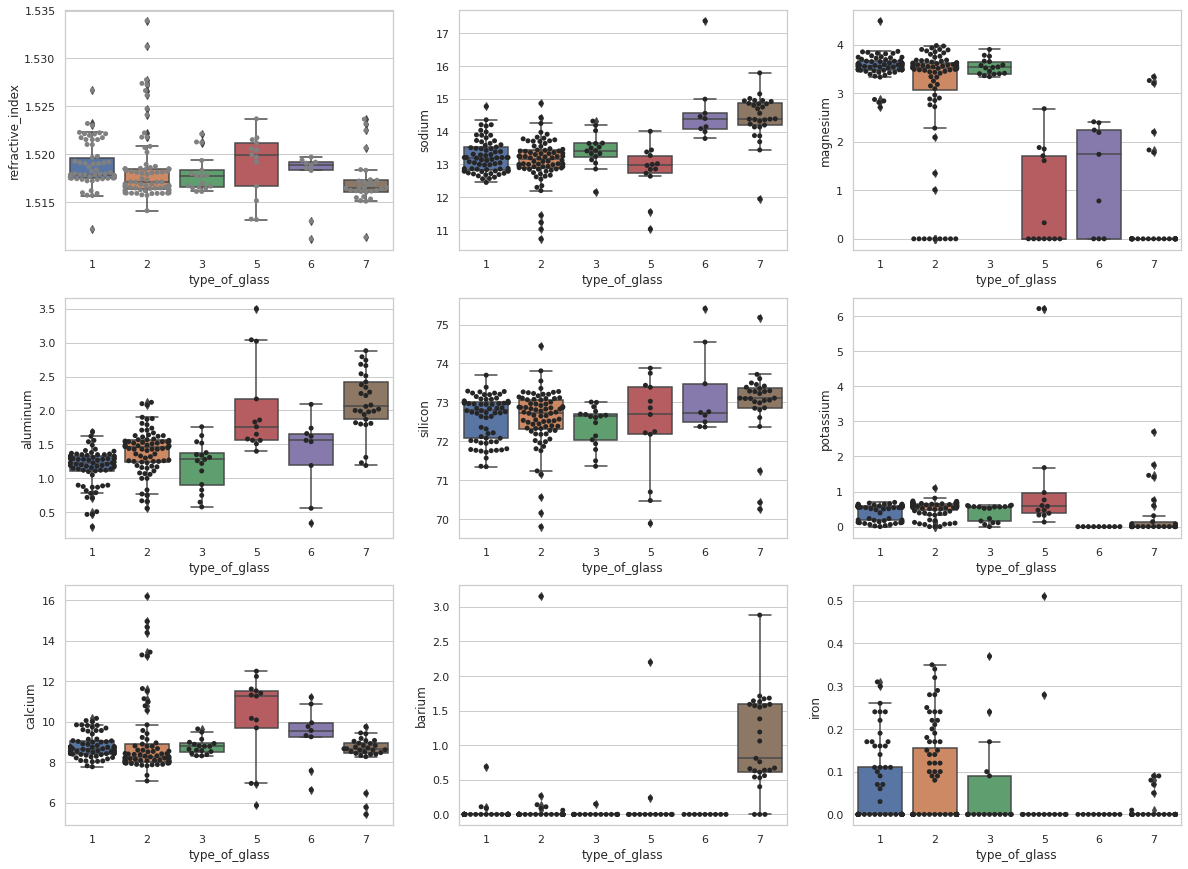

In [58]:
sns.set(style="whitegrid", font_scale=1)
plt.subplots(figsize = (20,15))

plt.subplot(3,3,1)
ax = sns.boxplot(x="type_of_glass", y="refractive_index", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="refractive_index", data=dataframe, color=".15")

plt.subplot(3,3,2)
ax = sns.boxplot(x="type_of_glass", y="sodium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="sodium", data=dataframe, color=".15")

plt.subplot(3,3,3)
ax = sns.boxplot(x="type_of_glass", y="magnesium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="magnesium", data=dataframe, color=".15")

plt.subplot(3,3,4)
ax = sns.boxplot(x="type_of_glass", y="aluminum", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="aluminum", data=dataframe, color=".15")

plt.subplot(3,3,5)
ax = sns.boxplot(x="type_of_glass", y="silicon", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="silicon", data=dataframe, color=".15")

plt.subplot(3,3,6)
ax = sns.boxplot(x="type_of_glass", y="potassium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="potassium", data=dataframe, color=".15")

plt.subplot(3,3,7)
ax = sns.boxplot(x="type_of_glass", y="calcium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="calcium", data=dataframe, color=".15")

plt.subplot(3,3,8)
ax = sns.boxplot(x="type_of_glass", y="barium", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="barium", data=dataframe, color=".15")

plt.subplot(3,3,9)
ax = sns.boxplot(x="type_of_glass", y="iron", data=dataframe)
ax = sns.swarmplot(x="type_of_glass", y="iron", data=dataframe, color=".15")

plt.show()

A few recommendations for you to solve the exercise. Remember the different types of algorithm that we have studied and follow a natural path in building the exercise. Commence using a single estimator and try to build a bagging estimator.

For the evaluation metric check this webpage:

https://scikit-learn.org/stable/modules/model_evaluation.html

Specially check those called balanced_accuracy and f1_micro.

Finally the submission of the exercise must be a model file with the name of your team (find one which is cool I will add the coolness of the name to the final grade). 

Check this webpage for saving the model: https://scikit-learn.org/stable/modules/model_persistence.html

One more thing I will evaluate using the np.random.seed(123) use it for training your model.

In case that a preprocessing of data is performed include a class in the notebook which transforms the original input to your desired one.

In [3]:
# Standarization
from sklearn.preprocessing import StandardScaler

X = dataframe.iloc[:,:-1]
std_scl = StandardScaler()
X_transformed = std_scl.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed)
X_transformed_df.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron"]

X_transformed_df.head(5)

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [7]:
Y = dataframe.iloc[:,-1:]

> Tenemos un problema de clasificación, ya que nuestra target es una variable categórica con 6 tipos o clases. Empezamos con un árbol de decisiones como modelo.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed_df, Y)

In [ ]:
#definir modelo
model = DecisionTreeClassifier(criterion="entropy")
#entrenar modelo
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
print("Metrica del modelo entrenado", model.score(X_train, Y_train))
print("Metrica del modelo testeando", model.score(X_test, Y_test))

Metrica del modelo entrenado 1.0
Metrica del modelo testeando 0.7592592592592593


In [ ]:
from  sklearn.metrics import accuracy_score
accuracy_score(Y_test, model.predict(X_test))

0.7592592592592593

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test, model.predict(X_test))

0.7055555555555556

In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_test,model.predict(X_test),average=None)

array([0.76190476, 0.7826087 , 0.57142857, 0.8       , 0.5       ,
       0.8       ])

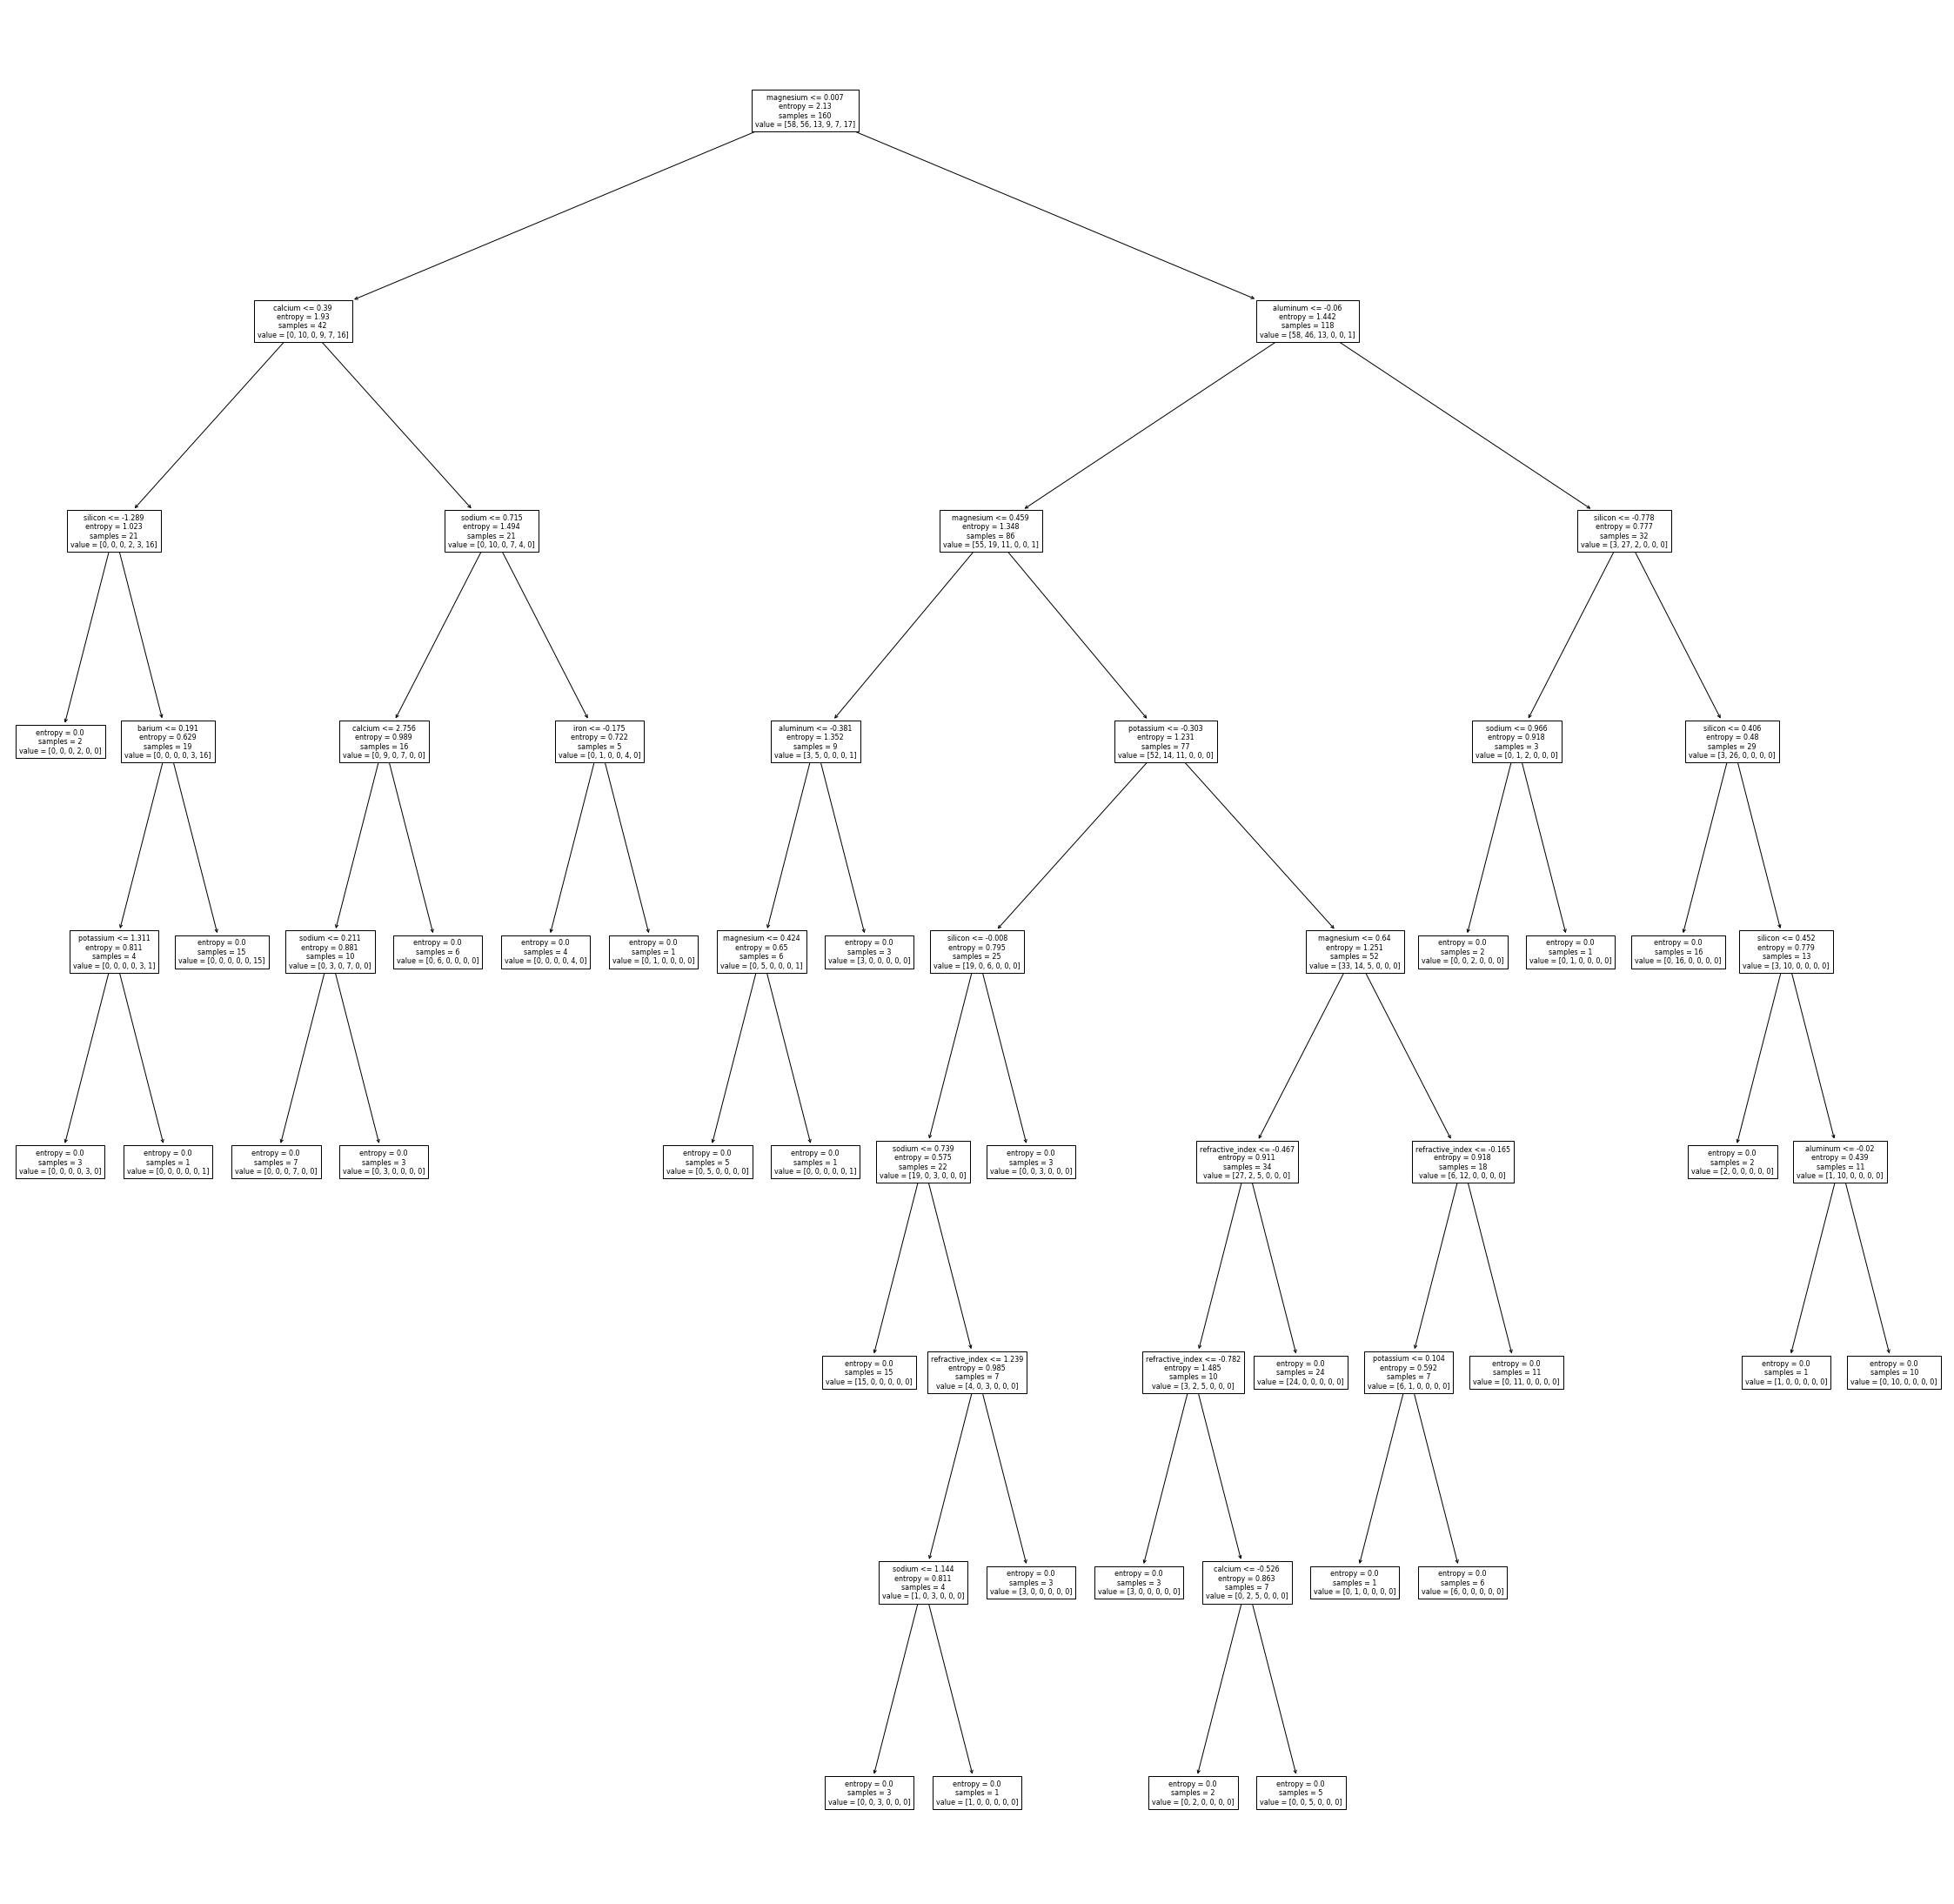

In [ ]:
fig, ax = plt.subplots(figsize=(40, 40))
plot_tree(model, feature_names=X_transformed_df.columns, fontsize=8)
plt.show()

> Añadimos hiperparámetros

In [ ]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth=40, min_samples_split=4)
model2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40, min_samples_split=4)

In [ ]:
#max_depth=40, min_samples_split=4 - MEJOR
print("Metrica del modelo entrenado", model2.score(X_train, Y_train))
print("Metrica del modelo testeando", model2.score(X_test, Y_test))

Metrica del modelo entrenado 0.99375
Metrica del modelo testeando 0.7777777777777778


In [ ]:
#max_depth=40, min_samples_split=6
print("Metrica del modelo entrenado", model2.score(X_train, Y_train))
print("Metrica del modelo testeando", model2.score(X_test, Y_test))

Metrica del modelo entrenado 0.975
Metrica del modelo testeando 0.7407407407407407


In [ ]:
#max_depth=37, min_samples_split=4
print("Metrica del modelo entrenado", model2.score(X_train, Y_train))
print("Metrica del modelo testeando", model2.score(X_test, Y_test))

Metrica del modelo entrenado 0.99375
Metrica del modelo testeando 0.7592592592592593


In [ ]:
accuracy_score(Y_test, model2.predict(X_test))

0.7592592592592593

In [ ]:
from sklearn.metrics import balanced_accuracy_score #peor que antes
balanced_accuracy_score(Y_test, model2.predict(X_test))

0.6833333333333335

In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_test,model.predict(X_test),average=None)

array([0.76190476, 0.7826087 , 0.57142857, 0.8       , 0.5       ,
       0.8       ])

> DUDA: AQUI LA CURVA ROC COMO SE HARÍA? PARA CADA TIPO

>RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

model_bagging = RandomForestClassifier(n_estimators=175, max_depth=15)

In [ ]:
model_bagging.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=15, n_estimators=175)

In [ ]:
model_bagging.score(X_test, Y_test)

0.7407407407407407

In [ ]:
base_estimator.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40, min_samples_split=4)

In [ ]:
base_estimator.score(X_test, Y_test)

0.7592592592592593

> Tuning Hyperparameters

>Opción 1

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

max_features_range = np.arange(1,30,1)
n_estimators_range = np.arange(10,209,5)

param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [10]:
grid.fit(X_train, Y_train)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200,
       205])})

In [11]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 2, 'n_estimators': 90} with a score of 0.78


In [ ]:
#The best parameters are {'max_features': 2, 'n_estimators': 90} with a score of 0.78


>Opción 2

In [13]:
param_grid2 = {'max_depth': np.arange(1,30,1), 'min_samples_split': np.arange(10,200,10)}
rf_2 = RandomForestClassifier()
grid2 = GridSearchCV(rf_2, param_grid2, scoring="balanced_accuracy", cv=5)

In [14]:
grid2.fit(X_train, Y_train)

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_split': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
             scoring='balanced_accuracy')

In [15]:
print("The best parameters are %s with a score of %0.2f"
      % (grid2.best_params_, grid.best_score_))

The best parameters are {'max_depth': 28, 'min_samples_split': 10} with a score of 0.78
